# 🏦 Loan Default Prediction

# 📑 Introduction

> The case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# 📝 Business Understanding

> A bank loan can provide numerous benefits, but it is a risk to both borrower and the lender. The lender runs the risk of lending you the money but not getting fully repaid. And as for borrower’s personal financial health, you can lose money or even your house. This is why lenders employ careful underwriting standards to minimize the risk for both parties.

> When the bank receives a loan application, a decision needs to be made for the loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

> - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
> - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


> The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for takin actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

> When a person applies for a loan, there are two types of decisions that could be taken by the company:
> 1. `Loan accepted`: If the company approves the loan, there are 3 possible scenarios described below:
    - `Fully paid`: Applicant has fully paid the loan (the principal and the interest rate)
    - `Current`: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - `Charged-off`: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
> 2. `Loan rejected`: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# 🎯 Business Objectives

>  How risky is the borrower? 
>  Given the borrower’s risk, should we lend him/her? 


#  Data Description

----
-----
Loan data info:

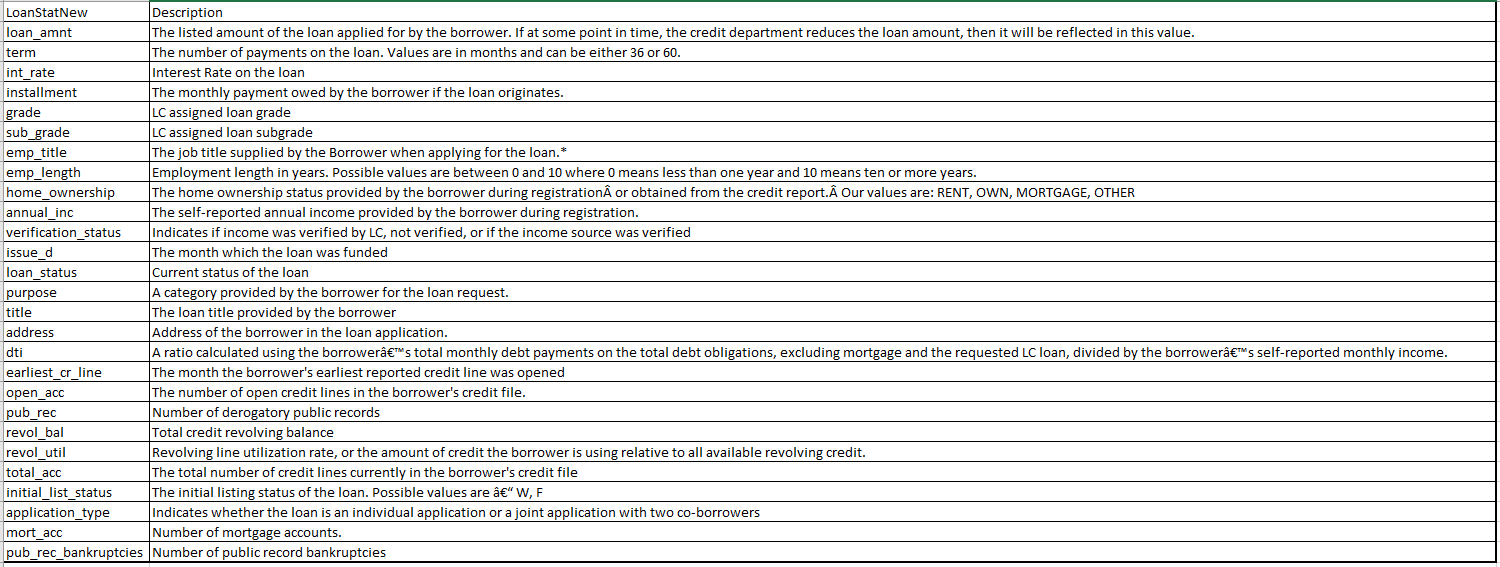



In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [18]:
data = pd.read_csv("DATA/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-15,Fully Paid,vacation,Vacation,26.24,Jun-90,16,0,36369,41.80,25,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-15,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-04,17,0,20131,53.30,27,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-15,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-07,13,0,11987,92.20,26,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-14,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-06,6,0,5472,21.50,13,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-13,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-99,13,0,24584,69.80,43,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\nGreggshire, VA 11650"


In [19]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


# 🔍 Exploratory Data Analysis (EDA)

> **OVERALL GOAL:** 
> - Get an understanding for which variables are important, view summary statistics, and visualize the data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  int64  
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

##  Resources

> https://hvplot.holoviz.org/   ---  A familiar and high-level API for data exploration and visualization 

    

##  Functions

In [21]:
#  Univariate function will plot the graphs based on the parameter values.


def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

## ✔️ `loan_status`

> Current status of the loan

In [22]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [index]   (loan_status)

C:\Users\memohan\AppData\Local\Temp\ipykernel_44432\168542291.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  temp = pd.Series(data = hue)


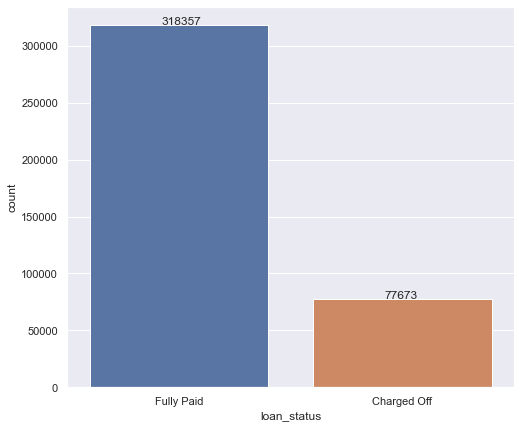

In [23]:
univariate(df=data,col='loan_status',vartype=1, hue=None)

<AxesSubplot:>

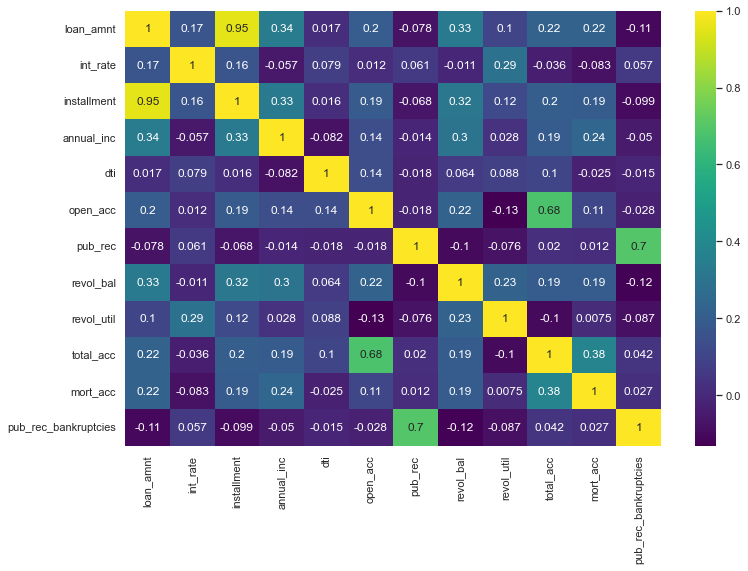

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

### 📌 Observation
> We noticed almost perfect correlation between "`loan_amnt`" the "`installment`" feature. We'll explore this features further. Print out their descriptions and perform a scatterplot between them. 

> - Does this relationship make sense to you? 
> - Do we think there is duplicate information here?

## ✔️ `loan_amnt` & `installment`

> - `installment`: The monthly payment owed by the borrower if the loan originates.
> - `loan_amnt`: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [25]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=40, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [26]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


## ✔️ `grade` & `sub_grade`

> - `grade`: LC assigned loan grade
> - `sub_grade`: LC assigned loan subgrade

Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. 

What are the unique possible `grade` & `sub_grade`?

In [27]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [28]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Grade.I  :Bars   [index]   (grade)
   .Bars.Grade.II :Bars   [index]   (grade)

In [29]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=400, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Sub_grade.I  :Bars   [index]   (sub_grade)
   .Bars.Sub_grade.II :Bars   [index]   (sub_grade)

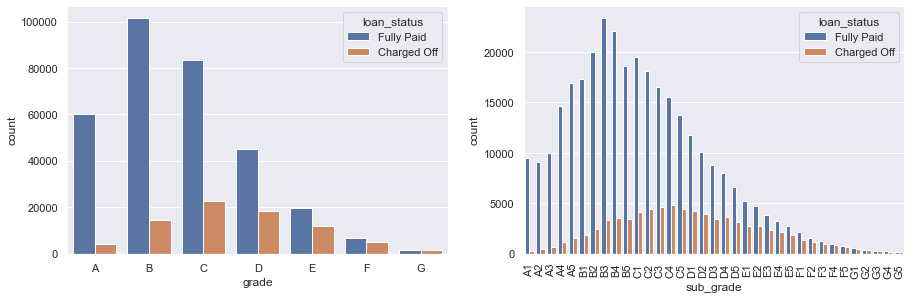

In [30]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

It looks like `F` and `G` subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

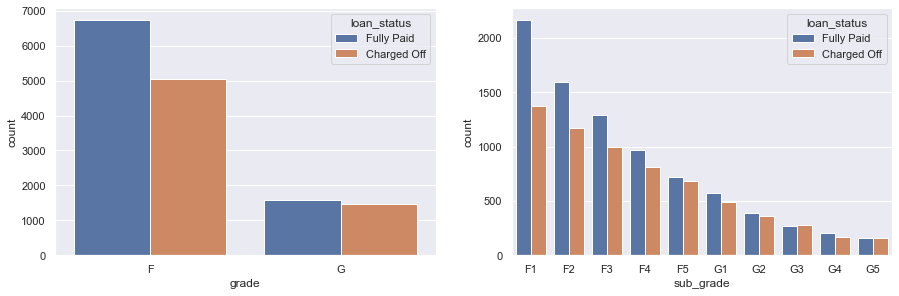

In [31]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

## ✔️ `term`, `home_ownership`, `verification_status` & `purpose`

> - `term`: The number of payments on the loan. Values are in months and can be either 36 or 60.
> - `home_ownership`: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
> - `verification_status`: Indicates if income was verified by LC, not verified, or if the income source was verified
> - `purpose`: A category provided by the borrower for the loan request.

In [32]:
data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [33]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=90)

home_ownership = data.home_ownership.value_counts().hvplot.bar(
    title="Loan Status by Grade", xlabel='Home Ownership', ylabel='Count', 
    width=350, height=350, legend='top'
).opts(xrotation=90)

(home_ownership_count + home_ownership)

:Layout
   .Overlay.Home_ownership :Overlay
      .Bars.Home_ownership.I  :Bars   [index]   (home_ownership)
      .Bars.Home_ownership.II :Bars   [index]   (home_ownership)
   .Bars.Home_ownership    :Bars   [index]   (home_ownership)

In [34]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

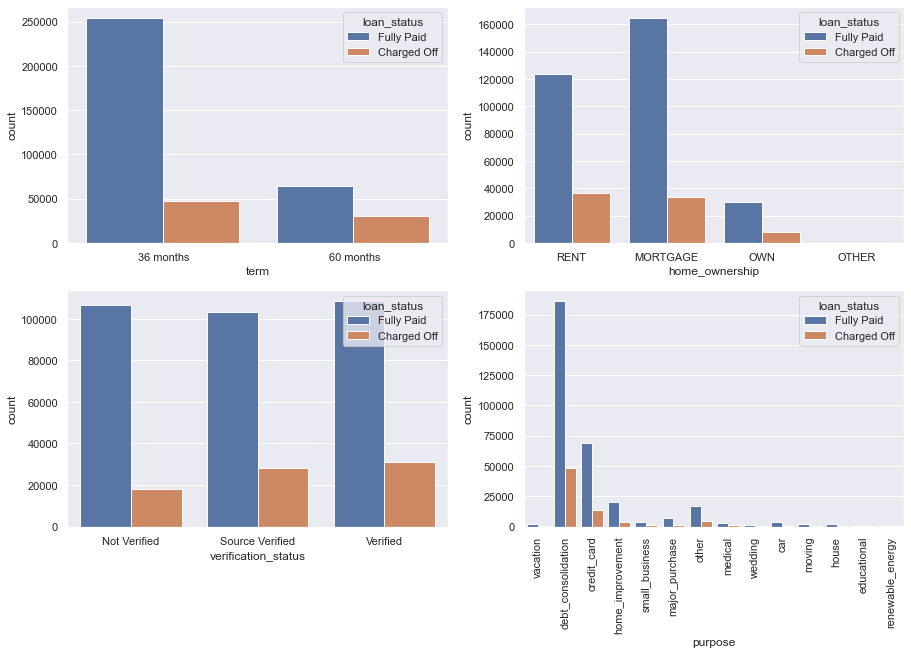

In [35]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [36]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

Fully Paid     123
Charged Off     23
Name: loan_status, dtype: int64

## ✔️ `int_rate` & `annual_inc`

> - `int_rate`: Interest Rate on the loan
> - `annual_inc`: The self-reported annual income provided by the borrower during registration

In [37]:
int_rate = data.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = data.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (annual_inc_count)

In [38]:
data[data.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status by Annual Income (<= 250000/Year)", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [39]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [40]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

Fully Paid     65
Charged Off    10
Name: loan_status, dtype: int64

In [41]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

Fully Paid     3509
Charged Off     568
Name: loan_status, dtype: int64

### 📌 Observation
- It seems that loans with high intersest rate are more likely to be unpaid.
- Only 75 (less then) borrowers have an annual income more than 1 million, and 4077

## ✔️ `emp_title` & `emp_length`

> - `emp_title`: The job title supplied by the Borrower when applying for the loan.
> - `emp_length`: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [42]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173103


In [43]:
data['emp_title'].value_counts()[:20]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: emp_title, dtype: int64

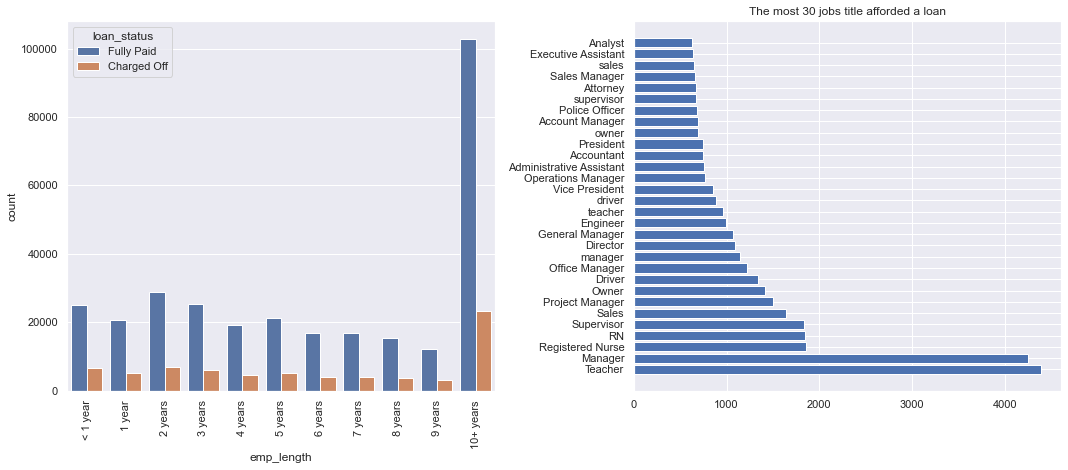

In [44]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

## ✔️ `issue_d`, `earliest_cr_line`

> - `issue_d`: The month which the loan was funded
> - `earliest_cr_line`: The month the borrower's earliest reported credit line was opened

## ✔️ `title`

> - `title`: The loan title provided by the borrower

In [45]:
data.title.isna().sum()

1755

In [46]:
data['title'] = data.title.str.lower()

In [47]:
data.title.value_counts()[:10]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: title, dtype: int64

`title` will be removed because we have the `purpose` column with is generated from it.

## ✔️ `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

> - `dti`: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
> - `open_acc`: The number of open credit lines in the borrower's credit file.
> - `revol_bal`: Total credit revolving balance
> - `revol_util`: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
> - `total_acc`: The total number of credit lines currently in the borrower's credit file

In [48]:
data.dti.value_counts()

0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: dti, Length: 4262, dtype: int64

In [49]:
dti = data.hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti Distribution", xlabel='dti', ylabel='Count'
)

sub_dti = data[data['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', shared_axes=False
)

dti + sub_dti

:Layout
   .Histogram.I  :Histogram   [dti]   (dti_count)
   .Histogram.II :Histogram   [dti]   (dti_count)

In [50]:
print(data[data['dti']>=40].shape)

(296, 27)


In [51]:
data.loc[data['dti']>=50, 'loan_status'].value_counts()

Fully Paid     26
Charged Off     9
Name: loan_status, dtype: int64

In [52]:
dti = data[data['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', 
    alpha=0.3, legend='top'
)

title="Loan Status by The number of open credit lines"

open_acc = data.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of credit lines"

total_acc = data.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [53]:
print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [54]:
print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [55]:
print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [56]:
title="Loan Status by Revolving line utilization rate"

revol_util = data.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by Revolving line utilization rate (<120)"

sub_revol_util = data[data.revol_util < 120].hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    shared_axes=False, alpha=0.4, legend='top'
)

revol_util + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

In [57]:
data[data.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.00,Verified,Apr-14,Fully Paid,debt_consolidation,debt consolidation,14.67,Oct-98,2,0,2677,892.30,9,f,INDIVIDUAL,0.00,0.00,"12506 Connie Burg\nVelasquezfort, TN 00813"


In [58]:
print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [59]:
title = "Loan Status by Total credit revolving balance"

revol_bal = data.hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top'
)

title = "Loan Status by Total credit revolving balance (<250000)"

sub_revol_bal = data[data['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)

In [60]:
data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

Fully Paid     351
Charged Off     46
Name: loan_status, dtype: int64

- It seems that the smaller the `dti` the more likely that the loan will not be paid.
- Only `217` borrower have more than `40` open credit lines.
- Only `266` borrower have more than `80` credit line in the borrower credit file.

## ✔️ `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`

> - `pub_rec`: Number of derogatory public records
> - `initial_list_status`: The initial listing status of the loan. Possible values are – W, F
> - `application_type`: Indicates whether the loan is an individual application or a joint application with two co-borrowers
> - `mort_acc`: Number of mortgage accounts
> - `pub_rec_bankruptcies`: Number of public record bankruptcies

In [61]:
xlabel = 'Number of derogatory public records'
title = "Loan Status by Number of derogatory public records"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Pub_rec.I  :Bars   [index]   (pub_rec)
   .Bars.Pub_rec.II :Bars   [index]   (pub_rec)

In [62]:
xlabel = "The initial listing status of the loan"
title = "Loan Status by The initial listing status of the loan"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Initial_list_status.I  :Bars   [index]   (initial_list_status)
   .Bars.Initial_list_status.II :Bars   [index]   (initial_list_status)

In [63]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Application Type", xlabel="Application Type", ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Application_type.I  :Bars   [index]   (application_type)
   .Bars.Application_type.II :Bars   [index]   (application_type)

In [64]:
xlabel = "Number of public record bankruptcies"
title = "Loan Status by The Number of public record bankruptcies"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Pub_rec_bankruptcies.I  :Bars   [index]   (pub_rec_bankruptcies)
   .Bars.Pub_rec_bankruptcies.II :Bars   [index]   (pub_rec_bankruptcies)

In [65]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [66]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

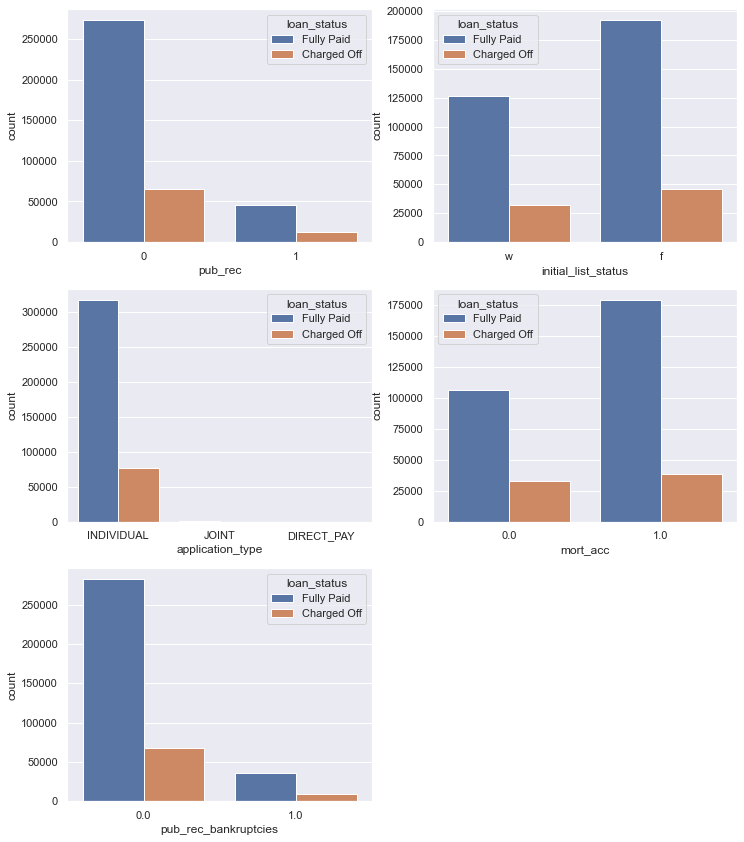

In [67]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

## Coorelating the numeric features and target variable

In [68]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [69]:
data.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Correlation between Loan status and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

:Bars   [index]   (loan_status)

****
## Conclusion:

Types of features: 
- 1. Features related to the applicant (demographic variables such as occupation, employment details etc.), 
- 2. Features related to loan characteristics (amount of loan, interest rate, purpose of loan etc.) 
****

# Data PreProcessing - Cleaning the Data


> - Remove or fill any missing data. 
> - Remove unnecessary or repetitive features. 
> - Convert categorical string features to dummy variables.

In [70]:
# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [71]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


### `emp_title`

In [72]:
data.emp_title.nunique()

173103

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [73]:
data.drop('emp_title', axis=1, inplace=True)

### `emp_length`

In [74]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [75]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
1   0.82
0   0.18
Name: loan_status, dtype: float64
4 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
1   0.79
0   0.21
Name: loan_status, dtype: float64
6 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
9 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
2 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
3 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
8 years years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
7 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
5 years years in this position:
1   0.81
0   0.19
Name: loan_status, dtype: float64
1 year years in this position:
1   0.80
0   0.20
Name: loan_status, dtype: float64
nan years in this position:
Series([], Name: loan_status, dtype: float64)


Charge off rates are extremely similar across all employment lengths. So we are going to drop the `emp_length` column.

In [76]:
data.drop('emp_length', axis=1, inplace=True)

### `title`

In [77]:
data.title.value_counts().head()

debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: title, dtype: int64

In [78]:
data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [79]:
data.drop('title', axis=1, inplace=True)

### `mort_acc`

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! 

Let's review the other columsn to see which most highly correlates to mort_acc

In [80]:
data.mort_acc.value_counts()

1.00    218458
0.00    139777
Name: mort_acc, dtype: int64

In [81]:
data.mort_acc.isna().sum()

37795

In [82]:
data.corr()['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()

:Bars   [index]   (mort_acc)

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [90]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc
print(total_acc_avg)

total_acc
2     0.00
3     0.03
4     0.04
5     0.07
6     0.10
      ... 
124   1.00
129   1.00
135   1.00
150   1.00
151   0.00
Name: mort_acc, Length: 118, dtype: float64


In [84]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [85]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

### `revol_util` & `pub_rec_bankruptcies`
These two features have missing data points, but they account for less than 0.5% of the total data. So we are going to remove the rows that are missing those values in those columns with dropna().

In [86]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [87]:
data.dropna(inplace=True)

In [88]:
data.shape

(395219, 24)

In [89]:
data.to_csv('DATA/LoanData_Model.csv')

## Categorical Variables and Dummy Variables

In [71]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


### `term`

In [72]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [73]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [74]:
data.term.unique()

array([36, 60], dtype=int64)

### `grade` & `sub_grade`

We know that `grade` is just a sub feature of `sub_grade`, So we are goinig to drop it.

In [75]:
data.drop('grade', axis=1, inplace=True)

In [76]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [77]:
data.drop('address', axis=1, inplace=True)

### `issue_d`, `earliest_cr_line` 

Irelevant data - whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [78]:
data.drop('issue_d', axis=1, inplace=True)
data.drop('earliest_cr_line', axis=1, inplace=True)


## 🔪 Train Test Split

In [79]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19615200686201828
Weight of negative values 0.8038479931379817


In [80]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(264796, 69)
(130423, 69)


# Removing Outliers

In [81]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(264776, 69)
(264796, 69)


In [82]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)
train.head()

(264796, 69)
(262143, 69)


,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,...,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
43729,6000,36,13.99,205.04,40000.00,1,24.39,12,0,6906,48.30,42,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
300769,15000,36,7.62,467.43,120000.00,1,5.33,8,0,17940,30.20,31,1.00,0.00,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
132630,2300,36,10.65,74.92,50000.00,1,6.62,3,0,8272,75.20,34,1.00,0.00,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
114106,21000,60,15.61,506.34,225000.00,1,10.11,9,1,10972,59.00,36,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
241171,15000,36,14.09,513.33,70000.00,1,18.22,6,0,11691,89.90,12,0.00,0.00,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


## 📏 Normalizing the data

In [83]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [84]:
X_train.dtypes

loan_amnt                        int64
term                             int64
int_rate                       float64
installment                    float64
annual_inc                     float64
                                ...   
application_type_INDIVIDUAL      uint8
application_type_JOINT           uint8
home_ownership_OTHER             uint8
home_ownership_OWN               uint8
home_ownership_RENT              uint8
Length: 68, dtype: object

In [85]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
print(list(data.columns))

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']


In [ ]:
data.to_csv('DATA/NormData.csv')

# Model Building

In [87]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [88]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# ✔️ Artificial Neural Networks (ANNs)

In [89]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [90]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
8192/8192 [==============================] - 18s 2ms/step - loss: 0.4666 - AUC: 0.6812 - val_loss: 0.4555 - val_AUC: 0.7054
Epoch 2/20
8192/8192 [==============================] - 16s 2ms/step - loss: 0.4570 - AUC: 0.6982 - val_loss: 0.4534 - val_AUC: 0.7111
Epoch 3/20
8192/8192 [==============================] - 15s 2ms/step - loss: 0.4559 - AUC: 0.7006 - val_loss: 0.4554 - val_AUC: 0.7127
Epoch 4/20
8192/8192 [==============================] - 16s 2ms/step - loss: 0.4546 - AUC: 0.7030 - val_loss: 0.4565 - val_AUC: 0.7142
Epoch 5/20
8192/8192 [==============================] - 15s 2ms/step - loss: 0.4539 - AUC: 0.7044 - val_loss: 0.4568 - val_AUC: 0.7143
Epoch 6/20
8192/8192 [==============================] - 16s 2ms/step - loss: 0.4536 - AUC: 0.7052 - val_loss: 0.4511 - val_AUC: 0.7158
Epoch 7/20
8192/8192 [==============================] - 15s 2ms/step - loss: 0.4528 - AUC: 0.7069 - val_loss: 0.4502 - val_AUC: 0.7164
Epoch 8/20
8192/8192 [==============================] -

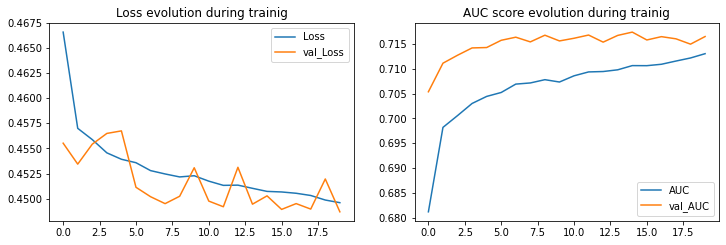

In [91]:
plot_learning_evolution(r)

In [92]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

8192/8192 [==============================] - 6s 656us/step
Train Result:
Accuracy Score: 80.68%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.56      0.82      0.81       0.69          0.76
recall        0.09      0.98      0.81       0.54          0.81
f1-score      0.16      0.89      0.81       0.52          0.75
support   51665.00 210478.00      0.81  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[  4748  46917]
 [  3728 206750]]



In [93]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

4076/4076 [==============================] - 3s 709us/step
Test Result:
Accuracy Score: 80.59%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.52      0.82      0.81       0.67          0.76
recall        0.09      0.98      0.81       0.53          0.81
f1-score      0.15      0.89      0.81       0.52          0.75
support   25480.00 104943.00      0.81  130423.00     130423.00
_______________________________________________
Confusion Matrix: 
 [[  2194  23286]
 [  2034 102909]]



In [94]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

4076/4076 [==============================] - 3s 746us/step


# ✔️ XGBoost Classifier

In [95]:
# param_grid = dict(
#     n_estimators=stats.randint(10, 500),
#     max_depth=stats.randint(1, 10),
#     learning_rate=stats.uniform(0, 1)
# )

xgb_clf = XGBClassifier(use_label_encoder=False)
# xgb_cv = RandomizedSearchCV(
#     xgb_clf, param_grid, cv=3, n_iter=60, 
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# xgb_cv.fit(X_train, y_train)

# best_params = xgb_cv.best_params_
# best_params['tree_method'] = 'gpu_hist'
# # best_params = {'n_estimators': 50, 'tree_method': 'gpu_hist'}
# print(f"Best Parameters: {best_params}")

# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

C:\Users\memohan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Result:
Accuracy Score: 81.65%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.69      0.82      0.82       0.76          0.80
recall        0.12      0.99      0.82       0.55          0.82
f1-score      0.21      0.90      0.82       0.55          0.76
support   51665.00 210478.00      0.82  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[  6341  45324]
 [  2792 207686]]

Test Result:
Accuracy Score: 80.74%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.54      0.82      0.81       0.68          0.76
recall        0.09      0.98      0.81       0.54          0.81
f1-score      0.16      0.89      0.81       0.53          0.75
support   25480.00 104943.00      0.81  130423.00     130423.00
_________________________________________

True Positives (TP) = the number of cases that were correctly classified to be positive, i.e. were predicted to be a success and were actually observed to be a success

False Positives (FP) = the number of cases that were incorrectly classified as positive, i.e. were predicted to be a success but were actually observed to be a failure

True Negatives (TN) = the number of cases that were correctly classified to be negative, i.e. were predicted to be a failure and were actually observed to be a failure

False Negatives (FN) = the number of cases that were incorrectly classified as negative, i.e. were predicted to be a failure but were actually observed to be a success

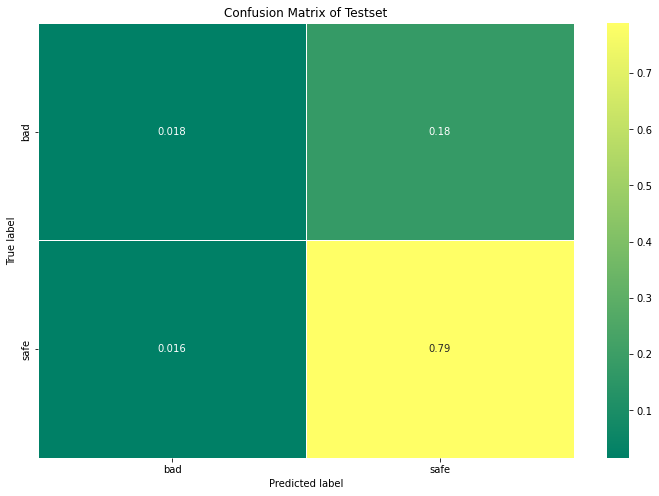

In [96]:
# Plot normalized confusion matrix
import matplotlib.cm as cm

cf_mat = confusion_matrix(y_test, y_test_pred)
cf_mat_p = cf_mat/cf_mat.sum()


plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['bad','safe'], yticklabels=['bad','safe'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix of Testset")
plt.show()

C:\Users\memohan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\memohan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


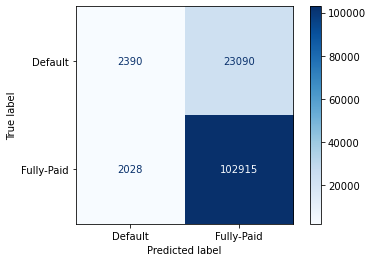

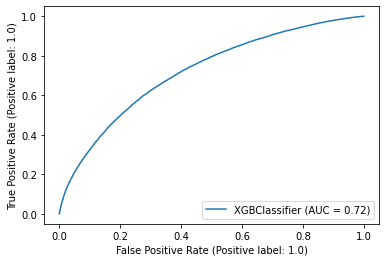

In [98]:
disp = plot_confusion_matrix(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)

In [99]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

# ✔️ Random Forest Classifier

In [100]:
# param_grid = dict(
#     n_estimators=stats.randint(100, 1500),
#     max_depth=stats.randint(10, 100),
#     min_samples_split=stats.randint(1, 10),
#     min_samples_leaf=stats.randint(1, 10),
# )

rf_clf = RandomForestClassifier(n_estimators=100)
# rf_cv = RandomizedSearchCV(
#     rf_clf, param_grid, cv=3, n_iter=60, 
#     scoring='roc_auc', n_jobs=-1, verbose=1
# )
# rf_cv.fit(X_train, y_train)
# best_params = rf_cv.best_params_
# print(f"Best Parameters: {best_params}")
# rf_clf = RandomForestClassifier(**best_params)


rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_

# Print the feature ranking
print("Top 20 Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), data.drop('loan_status', axis=1).columns), reverse=True)[:20]:
    print(v + ": " + str(k))

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Top 20 Feature importance ranking by Random Forest Model:
dti: 0.1022
int_rate: 0.095
revol_bal: 0.0941
revol_util: 0.0933
annual_inc: 0.0884
installment: 0.0872
total_acc: 0.077
loan_amnt: 0.0732
open_acc: 0.066
term: 0.0179
initial_list_status_w: 0.0154
purpose_debt_consolidation: 0.0122
verification_status_Source Verified: 0.0121
verification_status_Verified: 0.012
home_ownership_RENT: 0.0104
purpose_credit_card: 0.0093
mort_acc: 0.0093
pub_rec: 0.0091
home_ownership_OWN: 0.0076
pub_rec_bankruptcies: 0.0074
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   51665.00 210478.00      1.00  262143.00     262143.00
_______________________________________________
Confusi

C:\Users\memohan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\memohan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\memohan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one

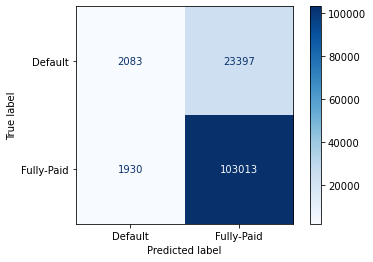

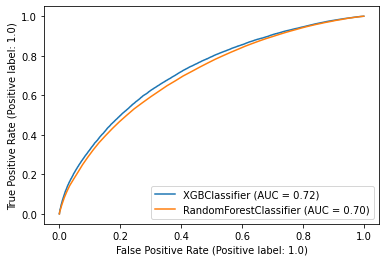

In [101]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Default', 'Fully-Paid'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)

In [102]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

#  Comparing Model Performance

In [103]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.532
XGBOOST                        roc_auc_score: 0.537
4076/4076 [==============================] - 3s 675us/step
ANNS                           roc_auc_score: 0.717


In [104]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)